In [1]:
from get_albedo import *

import matplotlib.pyplot as plt
%matplotlib inline


Bad key "axes.spines.right" on line 223 in
/home/nicola/python/eoldas/ESA_EOSS_2016/two_stream-1.1/matplotlibrc.
You probably need to get an updated matplotlibrc file from
http://matplotlib.sf.net/_static/matplotlibrc or from the matplotlib source
distribution

Bad key "axes.spines.top" on line 224 in
/home/nicola/python/eoldas/ESA_EOSS_2016/two_stream-1.1/matplotlibrc.
You probably need to get an updated matplotlibrc file from
http://matplotlib.sf.net/_static/matplotlibrc or from the matplotlib source
distribution

Bad key "axes.prop_cycle" on line 214 in
/home/nicola/python/eoldas/ESA_EOSS_2016/two_stream-1.1/matplotlibrc.
You probably need to get an updated matplotlibrc file from
http://matplotlib.sf.net/_static/matplotlibrc or from the matplotlib source
distribution


In [ ]:
alldata = []
obs = Observations("albedo_Northampton.sql")
for year in xrange(2005, 2016):
    print year
    x = obs.query(year, "Northampton_LowerFarm", -0.863234, 52.186673)
    alldata.append(x)
    print x

In [3]:
x.bhr_nir

array([ 0.25440224,  0.27705717,  0.23733863,  0.22939271,  0.25854892,
        0.26326212,  0.25521922,  0.2631876 ,  0.24714182,  0.25398723,
        0.30139625,  0.30139625,  0.31115373,  0.29664049,  0.31617166,
        0.30001863,  0.29589429,  0.3499651 ,  0.33699298,  0.34712883,
        0.39475705,  0.33081342,  0.33081342,  0.32640979,  0.31096455,
        0.28255849,  0.23889957,  0.24208334,  0.24317769,  0.23525985,
        0.25139644, -6.17454795,  0.22898329,  0.22898329,  0.22446515,
       -6.17454795, -6.17454795,  0.17652577,  0.12811898,  0.18062869,
        0.1835817 ,  0.16630702,  0.16395673, -6.17454795, -6.17454795,
        0.17928176,  0.18336148,  0.17175654,  0.17445901,  0.17683868])

In [34]:
from da_functions import regularised_tip_inversion, tip_inversion

def regularised_inversion ( fluxnet_site, year, green_leaves, gamma_lai,
                                       n_tries=5, albedo_unc=[0.05, 0.07] ):

    
    retval_s, state, obs = tip_inversion( year, fluxnet_site, green_leaves=green_leaves,
                                          n_tries=n_tries )
    mu = state.operators['Prior'].mu
    cinv = state.operators['Prior'].inv_cov
    c = np.array(np.sqrt(np.linalg.inv (cinv.todense()).diagonal())).squeeze()
    post_sd = np.sqrt(np.array(retval_s['post_cov'].todense()).squeeze())
    post_sd_single = np.where(post_sd > c, c, post_sd)

    
    retval, state, obs = regularised_tip_inversion( year, fluxnet_site, [1e-3, 0, 0.1, 1e-3, 0, 0.1, gamma_lai  ],
                                                    x0=retval_s['real_map'], green_leaves=green_leaves,
                                                    n_tries=n_tries, albedo_unc=albedo_unc )
    mu = state.operators['Prior'].mu
    cinv = state.operators['Prior'].inv_cov
    c = np.array(np.sqrt(np.linalg.inv (cinv.todense()).diagonal())).squeeze()
    post_sd = np.sqrt(np.array(retval['post_cov'].todense()).squeeze())
    post_sd = np.where(post_sd > c, c, post_sd)
    return retval, state, obs, mu, post_sd

2005
Saving results to eoldas_retval_20161027_174110_SH97R
[19.250032681367504, 18.280501791916649, 18.492733437432982, 18.32428220039407, 18.336158976009877, 18.431065825061211, 18.370178570604661, 18.601548631778318, 18.649985322613716, 19.058711130912993]
Chosen cost: 18.2805
Saving results to eoldas_retval_20161027_174212_SH97R
[20.583399196867262, 21.936414481247883, 20.4776869321127, 20.412429672756279, 22.466315317310642, 153.51724438451782, 20.33532793156558, 20.766128630891671, 20.401132540411982, 20.720519489883248]
Chosen cost: 20.3353
2006
Saving results to eoldas_retval_20161027_174254_SH97R
[15.837047578610367, 49.042375520464276, 15.200921854530693, 15.326509327316982, 15.552579005199666, 16.528183193440299, 15.21914420069939, 16.462909823771327, 15.208809330265519, 15.299508195536891]
Chosen cost: 15.2009
Saving results to eoldas_retval_20161027_174359_SH97R
[17.104994604856561, 17.110112176911223, 17.093023467680066, 21.400283617715882, 17.654964312624159, 17.251176433

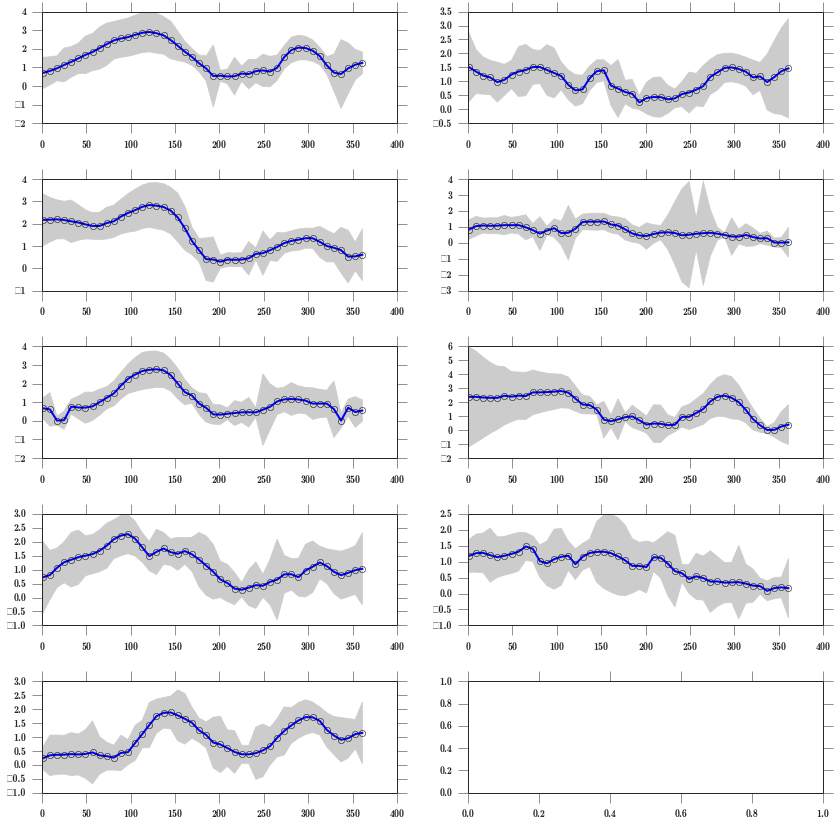

In [38]:
retvals = []
states = []
post_sds = []
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(14,14))
axs= axs.flatten()
for year, ax in zip(xrange(2005,2015), axs):
    print year
    retval, state, obs, mu, post_sd = regularised_inversion(
        "Northampton_LowerFarm", year, green_leaves=False, gamma_lai=1, n_tries=10)
    retvals.append(retval)
    states.append(state)
    post_sds.append(post_sd)
    
    
    i = 6
    ax.fill_between ( state.state_grid, retval['real_map']['lai'] - post_sd[(i*46):((i+1)*46)],
                            retval['real_map']['lai'] + post_sd[(i*46):((i+1)*46)], lw=0.8, color="0.8")
    ax.plot(state.state_grid, retval['real_map']['lai'], 'o-', mfc="none")
    ax.set_xlim([-2, 4])

/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=x-large. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)


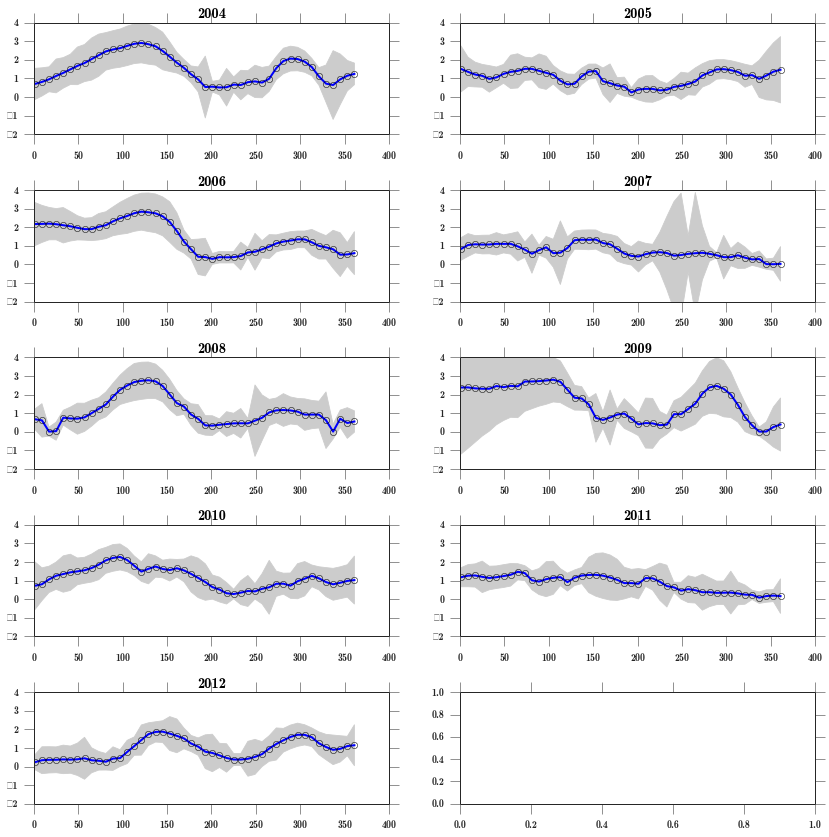

In [51]:
 
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(14,14))
axs = axs.flatten()
for state, retval, post_sd, ax, year in zip(states, retvals, post_sds, axs, xrange(2004, 2014)):
    i = 6
    ax.fill_between ( state.state_grid, retval['real_map']['lai'] - post_sd[(i*46):((i+1)*46)],
                            retval['real_map']['lai'] + post_sd[(i*46):((i+1)*46)], lw=0.8, color="0.8")
    ax.plot(state.state_grid, retval['real_map']['lai'], 'o-', mfc="none")
    ax.set_ylim([-2, 4])
    ax.set_title(year)

/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=large. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)


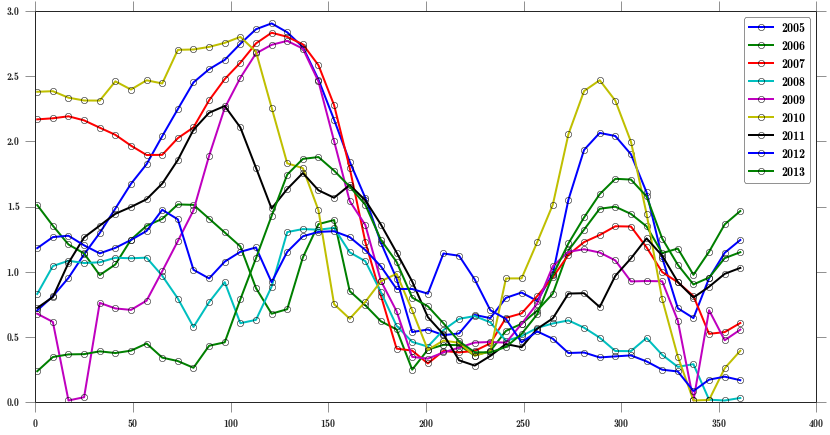

In [43]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,7))


for state, retval in zip(states, retvals):
    
    i = 6
    #ax.fill_between ( state.state_grid, retval['real_map']['lai'] - post_sd[(i*46):((i+1)*46)],
    #                        retval['real_map']['lai'] + post_sd[(i*46):((i+1)*46)], lw=0.8, color="0.8")
    ax.plot(state.state_grid, retval['real_map']['lai'], 'o-', mfc="none")
ax.legend (range(2005,2015))